In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# no scientific notation prnting
np.set_printoptions(suppress=True)

In [3]:

degrees = np.linspace(0, 180,36, endpoint=False).astype(int)
print(degrees)

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175]


In [5]:
reversed_degrees = np.linspace(180, 0, 36, endpoint=False).astype(int)
reversed_degrees

array([180, 175, 170, 165, 160, 155, 150, 145, 140, 135, 130, 125, 120,
       115, 110, 105, 100,  95,  90,  85,  80,  75,  70,  65,  60,  55,
        50,  45,  40,  35,  30,  25,  20,  15,  10,   5])

In [6]:
sin_signal =np.sin(degrees)
sin_signal

array([ 0.        , -0.95892427, -0.54402111,  0.65028784,  0.91294525,
       -0.13235175, -0.98803162, -0.42818267,  0.74511316,  0.85090352,
       -0.26237485, -0.99975517, -0.30481062,  0.82682868,  0.77389068,
       -0.38778164, -0.99388865, -0.17607562,  0.89399666,  0.68326171,
       -0.50636564, -0.97053528, -0.04424268,  0.94543533,  0.58061118,
       -0.61604046, -0.93010595,  0.08836869,  0.98023966,  0.46774516,
       -0.71487643, -0.87331198,  0.21942526,  0.99779728,  0.34664946,
       -0.8011346 ])

In [7]:
data = degrees
for i in range(10000-1):
  if i % 2 == 0:
    data = np.hstack((data, reversed_degrees))
  else:
    data = np.hstack((data, degrees))

In [8]:
data[:200]

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 175, 170,
       165, 160, 155, 150, 145, 140, 135, 130, 125, 120, 115, 110, 105,
       100,  95,  90,  85,  80,  75,  70,  65,  60,  55,  50,  45,  40,
        35,  30,  25,  20,  15,  10,   5,   0,   5,  10,  15,  20,  25,
        30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,
        95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155,
       160, 165, 170, 175, 180, 175, 170, 165, 160, 155, 150, 145, 140,
       135, 130, 125, 120, 115, 110, 105, 100,  95,  90,  85,  80,  75,
        70,  65,  60,  55,  50,  45,  40,  35,  30,  25,  20,  15,  10,
         5,   0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,
        60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120,
       125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 18

In [9]:
sin_signal = np.sin(data)

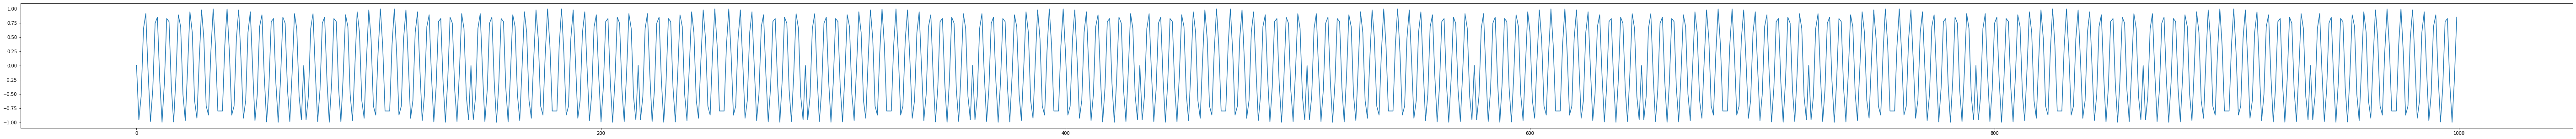

Shape of data: (360000,)


In [10]:
plt.figure(figsize=(100,5))
plt.plot(sin_signal[:1000])
plt.show()
print(f'Shape of data: {sin_signal.shape}')

In [10]:
sin_signal

array([ 0.        , -0.95892427, -0.54402111, ...,  0.65028784,
       -0.54402111, -0.95892427])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten

In [ ]:
dummy_model = Sequential([
  Conv1D(num)
])

In [13]:
def rolling(x, window):
    shape = (x.size - window + 1, window)
    strides = (x.itemsize, x.itemsize)
    return np.lib.stride_tricks.as_strided(x, shape=shape, strides=strides)

In [14]:
sequenced_signal_viz = rolling(sin_signal, 10)



In [15]:
print(f'Shape of signal: {sequenced_signal_viz.shape}\n')
np.set_printoptions(precision=2)
print(sequenced_signal_viz[:5])

Shape of signal: (719991, 10)

[[ 0.   -0.96 -0.54  0.65  0.91 -0.13 -0.99 -0.43  0.75  0.85]
 [-0.96 -0.54  0.65  0.91 -0.13 -0.99 -0.43  0.75  0.85 -0.26]
 [-0.54  0.65  0.91 -0.13 -0.99 -0.43  0.75  0.85 -0.26 -1.  ]
 [ 0.65  0.91 -0.13 -0.99 -0.43  0.75  0.85 -0.26 -1.   -0.3 ]
 [ 0.91 -0.13 -0.99 -0.43  0.75  0.85 -0.26 -1.   -0.3   0.83]]


In [16]:
sequenced_signal = rolling(sin_signal, 100)
print(f'Shape of sequenced signal: {sequenced_signal.shape}\n')

Shape of sequenced signal: (719901, 100)



In [54]:
y = sequenced_signal[:,0]
print(y.shape)
y

(719901,)


array([ 0.  , -0.96, -0.54, ...,  0.47,  0.98,  0.09])

In [55]:
X = sequenced_signal[:-1,:]
y = y[1:]
print(y.shape)

(719900,)


In [56]:
print(sequenced_signal[-5:, -2:])
print(X[-5:, -2: ])
print(sequenced_signal.shape)
print(X.shape)

[[-0.99 -0.13]
 [-0.13  0.91]
 [ 0.91  0.65]
 [ 0.65 -0.54]
 [-0.54 -0.96]]
[[-0.43 -0.99]
 [-0.99 -0.13]
 [-0.13  0.91]
 [ 0.91  0.65]
 [ 0.65 -0.54]]
(719901, 100)
(719900, 100)


In [57]:
print(sequenced_signal[:5,:2])
print(y[:5])

[[ 0.   -0.96]
 [-0.96 -0.54]
 [-0.54  0.65]
 [ 0.65  0.91]
 [ 0.91 -0.13]]
[-0.96 -0.54  0.65  0.91 -0.13]


In [85]:
num_filters = 32
filter_size = 3
pool_size = 2
model = Sequential([
  Dense(16, activation='relu'),
  Dense(1)
])

In [86]:
from tensorflow.keras.losses import MeanAbsoluteError
model.compile(
  'adam',
  loss= MeanAbsoluteError(),
  metrics=['mae'],
)

In [87]:
from sklearn.model_selection import train_test_split

X_train_pre, X_test, y_train_pre, y_test = train_test_split(X, y, test_size=0.05, random_state=99)

In [88]:
print(f'X_train shape: {X_train_pre.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train_pre.shape}\ny_test shape: {y_test.shape}')

X_train shape: (683905, 100)
X_test shape: (35995, 100)
y_train shape: (683905,)
y_test shape: (35995,)


In [89]:
X_train, X_val, y_train, y_val = train_test_split(X_train_pre, y_train_pre, test_size=0.1, random_state=99)

In [90]:
print(f'X_train shape: {X_train.shape}\nX_val shape: {X_val.shape}\ny_train shape: {y_train.shape}\ny_val shape: {y_val.shape}')

X_train shape: (615514, 100)
X_val shape: (68391, 100)
y_train shape: (615514,)
y_val shape: (68391,)


In [91]:
model.fit(
  X_train,
  y_train,
  epochs=10,
  validation_data=(X_val, y_val),
)

Epoch 1/10
19235/19235 [==============================] - 26s 1ms/step - loss: 0.0143 - mae: 0.0143 - val_loss: 0.0078 - val_mae: 0.0078
Epoch 2/10
19235/19235 [==============================] - 24s 1ms/step - loss: 0.0061 - mae: 0.0061 - val_loss: 0.0059 - val_mae: 0.0059
Epoch 3/10
19235/19235 [==============================] - 24s 1ms/step - loss: 0.0048 - mae: 0.0048 - val_loss: 0.0043 - val_mae: 0.0043
Epoch 4/10
19235/19235 [==============================] - 25s 1ms/step - loss: 0.0042 - mae: 0.0042 - val_loss: 0.0049 - val_mae: 0.0049
Epoch 5/10
19235/19235 [==============================] - 25s 1ms/step - loss: 0.0038 - mae: 0.0038 - val_loss: 0.0029 - val_mae: 0.0029
Epoch 6/10
19235/19235 [==============================] - 24s 1ms/step - loss: 0.0035 - mae: 0.0035 - val_loss: 0.0028 - val_mae: 0.0028
Epoch 7/10
19235/19235 [==============================] - 25s 1ms/step - loss: 0.0033 - mae: 0.0033 - val_loss: 0.0029 - val_mae: 0.0029
Epoch 8/10
19235/19235 [=================

In [92]:
predictions = model.predict(X_test)
predictions

array([[ 0.83],
       [-0.87],
       [-0.55],
       ...,
       [ 0.83],
       [ 0.83],
       [-0.17]], dtype=float32)

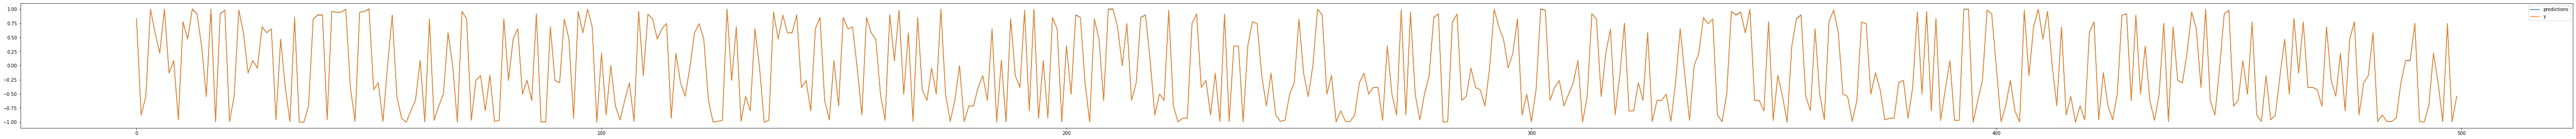

In [105]:
plt.figure(figsize=(100,5))
plt.plot(predictions[:500], label = "predictions")
plt.plot(y_test[:500], label = "y")
plt.legend()
plt.show()

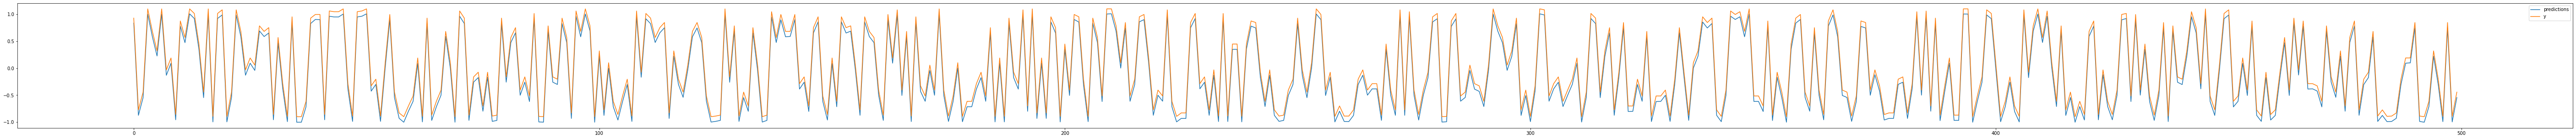

In [106]:
y_offset = y_test[:500]+0.1
plt.figure(figsize=(100,5))
plt.plot(predictions[:500], label = "predictions")
plt.plot(y_offset, label = "y")
plt.legend()
plt.show()